In [27]:
import os
os.getcwd()

'/home/xilinx/jupyter_notebooks'

In [39]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")




#Audio Function
PAudio = base.audio
Roo = "Testtwo.wav"

In [40]:
#Selecting MIC block
PAudio.select_microphone()


In [41]:
PAudio.record(10)

#Save in directory 
PAudio.save("Testtwo.wav")

In [42]:
# load from memory
PAudio.load("/home/xilinx/jupyter_notebooks/Testtwo.wav")
PAudio.play()




from IPython.display import Audio as IPAudio
IPAudio("/home/xilinx/jupyter_notebooks/Testtwo.wav")

In [43]:
get_ipython().magic('matplotlib inline')
import wave
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.fftpack import fft

In [44]:
wav_path = "/home/xilinx/jupyter_notebooks/Testtwo.wav"

with wave.open(wav_path, 'r') as wav_file:
    raw_frames = wav_file.readframes(-1)
    num_frames = wav_file.getnframes()
    num_channels = wav_file.getnchannels()
    sample_rate = wav_file.getframerate()
    sample_width = wav_file.getsampwidth()
    
temp_buffer = np.empty((num_frames, num_channels, 4), dtype=np.uint8)
raw_bytes = np.frombuffer(raw_frames, dtype=np.uint8)
temp_buffer[:, :, :sample_width] = raw_bytes.reshape(-1, num_channels, 
                                                    sample_width)
temp_buffer[:, :, sample_width:] =     (temp_buffer[:, :, sample_width-1:sample_width] >> 7) * 255
frames = temp_buffer.view('<i4').reshape(temp_buffer.shape[:-1])

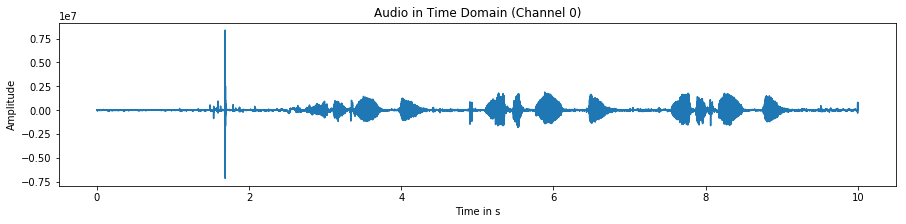

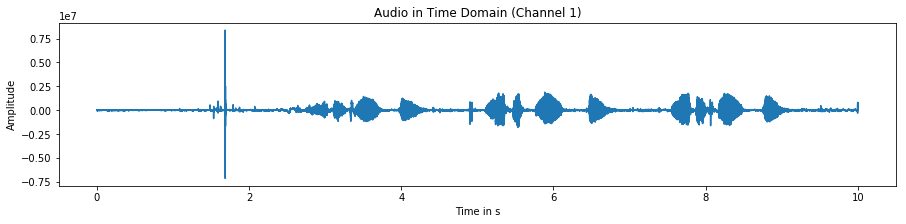

In [45]:
for channel_index in range(num_channels):
    plt.figure(num=None, figsize=(15, 3))
    plt.title('Audio in Time Domain (Channel {})'.format(channel_index))
    plt.xlabel('Time in s')
    plt.ylabel('Amplitude')
    time_axis = np.arange(0, num_frames/sample_rate, 1/sample_rate)
    plt.plot(time_axis, frames[:, channel_index])
    plt.show()

In [50]:
import time 
from time import sleep
from pynq import Overlay
base = Overlay("base.bit")



#Declare Variables for specific colours
RGBLEDS_XGPIO_OFFSET = 0
RGBLEDS_START_INDEX = 4
RGB_CLEAR = 0
RGB_BLUE = 1
RGB_GREEN = 2
RGB_CYAN = 3
RGB_RED = 4
RGB_MAGENTA = 5
RGB_YELLOW = 6


count = 3;


def LED_GREEN():
    base.btns_gpio.read()
    base.rgbleds_gpio.write(0, RGB_GREEN)
    
    
def LED_BLUE():
    base.btns_gpio.read()
    base.rgbleds_gpio.write(0, RGB_BLUE)
    
    
def LED_RED():
    base.btns_gpio.read()
    base.rgbleds_gpio.write(0, RGB_RED)
    
    
def LED_CYAN():
    base.btns_gpio.read()
    base.rgbleds_gpio.write(0, RGB_CYAN)
    
    
def LED_MARG():
    base.btns_gpio.read()
    base.rgbleds_gpio.write(0, RGB_MAGENTA)

def LED_YELLOW():
    base.btns_gpio.read()
    base.rgbleds_gpio.write(0, RGB_YELLOW)

# ********************************************
def LED_OFF():
    base.btns_gpio.read()
    base.rgbleds_gpio.write(0, RGB_CLEAR)

    



# ### Processing Speech Recognition


import speech_recognition as sr

#Use recordings as a basis to show Speech Recognition works 
# If there is no capture of audio there will have no text to transform

path = "/home/xilinx/jupyter_notebooks/Testtwo.wav"

r = sr.Recognizer()
with sr.WavFile(path) as source:
    print("Wav File : ", path)
    audio = r.listen(source)
text = r.recognize_google(audio)
print(text)


### Outputting Login Credentials

# The output data compares words with keywords once the string has been split.
# The input is the wav file recorded from for 10 seconds
# That data is then converted from speech --> text
# Compare the data with keywords (Ideally for security) 
#     If correct = Green - Login success
#     If wrong   = Red   - Login failed
#     





pw = text.split()
print (pw)



    

if ('hello') or ('Hello') or ('Let me in') or ('let me in') in pw:
    print("Login Successfull")

    LED_GREEN()
    sleep(5)
    LED_OFF()
    

if not ('Hello' or 'hello' or 'Let me in') in pw:
    print("Login Failed")
    LED_RED()
    sleep(5)
    LED_OFF()

Wav File :  /home/xilinx/jupyter_notebooks/Testtwo.wav
let me in let me in let me in
['let', 'me', 'in', 'let', 'me', 'in', 'let', 'me', 'in']
Login Successfull
Login Failed
